In [1]:
%config InlineBackend.figure_format = "retina"

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns


import math

import numpy as np
import pandas as pd

import ROOT, uproot

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import feature_selection
from sklearn.model_selection import StratifiedKFold
from sklearn.utils import class_weight
from sklearn import decomposition

# import necessary keras modules/functions
import keras
from keras.models import load_model
from keras.models import Sequential
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.callbacks import EarlyStopping, LearningRateScheduler
from keras import backend as K

from pickle import dump

from time import time

In /home/bora/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/bora/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/bora/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/bora/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/bora/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_c

Welcome to JupyROOT 6.18/04


Using TensorFlow backend.
/home/bora/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/bora/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/bora/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/bora/.local/lib/python3.6/site-packages/tensorflow/python/framewo

In [6]:
def upsample(sample, scale):
    '''
    This function takes the sample and concatantes the same sample n times.
    '''
    if scale > 0:
        sample = np.vstack([sample]*scale)
    else:
        sample = sample
    return sample

from IPython.display import clear_output

import keras
import matplotlib.pyplot as plt
from IPython.display import clear_output

class PlotLearning(keras.callbacks.Callback):
    
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.acc = []
        self.val_acc = []
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):

        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.acc.append(logs.get('accuracy'))
        self.val_acc.append(logs.get('val_accuracy'))
        self.i += 1
        f, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(10,5))
        
        clear_output(wait=True)
        
        #ax1.set_yscale('log')
        ax1.plot(self.x, self.losses, label="loss")
        ax1.plot(self.x, self.val_losses, label="val_loss")
        ax1.legend()
        
        ax2.plot(self.x, self.acc, label="accuracy({:.1f}%)".format(100*self.acc[-1]))
        
        max_acc = max(self.acc)
        
        ax2.plot(self.x, len(self.x)*[max_acc], 'b--', label="max acc. attained ({:.1f}%)".format(100*max_acc))

        ax2.plot(self.x, self.val_acc, label="validation accuracy({:.1f}%)".format(100*self.val_acc[-1]))
        
        max_val_acc = max(self.val_acc)
        
        ax2.plot(self.x, len(self.x)*[max_val_acc], 'g--', label="max val. acc. attained ({:.1f}%)".format(100*max_val_acc))
        
        ax2.legend(loc="lower right")
        
        plt.show();
        
plot = PlotLearning()

In [7]:
import keras
import tensorflow as tf
config = tf.ConfigProto( device_count = {'GPU': 1} ) 
sess = tf.Session(config=config) 
keras.backend.set_session(sess)

2021-05-30 14:24:07.996094: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1640] Found device 0 with properties: 
name: Quadro RTX 5000 major: 7 minor: 5 memoryClockRate(GHz): 1.815
pciBusID: 0000:2d:00.0
2021-05-30 14:24:07.996230: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library libcudart.so.10.0
2021-05-30 14:24:07.996270: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library libcublas.so.10.0
2021-05-30 14:24:07.996302: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library libcufft.so.10.0
2021-05-30 14:24:07.996333: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library libcurand.so.10.0
2021-05-30 14:24:07.996364: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library libcusolver.so.10.0
2021-05-30 14:24:07.996394: I tensorflow/stream_executor/pla

In [10]:
branches = ['br_njets', 'br_nbjets', 'br_scalar_ht',
            'br_jet_pt_1', 'br_jet_pt_2', 'br_jet_pt_3', 'br_jet_pt_4', 'br_met',
            'br_met_phi', 'br_sphericity', 'br_aplanarity', 'br_fox_wolfram_1',
            'br_fox_wolfram_2', 'br_fox_wolfram_3', 'br_fox_wolfram_4', 'br_w_pt', 
            'br_w_eta', 'br_w_phi', 'br_operator_4', 'br_operator_9',
            'br_operator_10', 'br_operator_12','br_operator_14' ]

df_signal      = uproot.open("/mnt/harddisk4/scratch/ttbar_no_dtG_flat.root")["outtree"].pandas.df(branches)
df_dyjets      = uproot.open("/mnt/harddisk4/scratch/dyjets_flat_30M.root")["outtree"].pandas.df(branches)
df_wjets       = uproot.open("/mnt/harddisk4/scratch/wjets_flat_60M.root")["outtree"].pandas.df(branches)
df_single_top  = uproot.open("/mnt/harddisk4/scratch/single_top_merged_flat.root")["outtree"].pandas.df(branches)

df_signal.to_hdf("smcedm_ntuples.h5", key="df_signal", mode="w")
df_dyjets.to_hdf("smcedm_ntuples.h5", key="df_dyjets", mode="w")
df_wjets.to_hdf("smcedm_ntuples.h5", key="df_wjets", mode="w")
df_single_top.to_hdf("smcedm_ntuples.h5", key="df_single_top", mode="w")

In [7]:
additional_features = False
if additional_features:
    ########################################################################################################################
    branches = ["mean_jet_pt"] + branches

    df_signal["mean_jet_pt"]     = df_signal[['br_jet_pt_1', 'br_jet_pt_2', 'br_jet_pt_3', 'br_jet_pt_4']].mean(axis=1)
    df_dyjets["mean_jet_pt"]     = df_dyjets[['br_jet_pt_1', 'br_jet_pt_2', 'br_jet_pt_3', 'br_jet_pt_4']].mean(axis=1)
    df_wjets["mean_jet_pt"]      = df_wjets[['br_jet_pt_1', 'br_jet_pt_2', 'br_jet_pt_3', 'br_jet_pt_4']].mean(axis=1)
    df_single_top["mean_jet_pt"] = df_single_top[['br_jet_pt_1', 'br_jet_pt_2', 'br_jet_pt_3', 'br_jet_pt_4']].mean(axis=1)

    df_signal     = df_signal[branches]
    df_dyjets     = df_dyjets[branches]
    df_wjets      = df_wjets[branches]
    df_single_top = df_single_top[branches]

    ########################################################################################################################
    branches = ["std_jet_pt"] + branches

    df_signal["std_jet_pt"]     = df_signal[['br_jet_pt_1', 'br_jet_pt_2', 'br_jet_pt_3', 'br_jet_pt_4']].std(axis=1)
    df_dyjets["std_jet_pt"]     = df_dyjets[['br_jet_pt_1', 'br_jet_pt_2', 'br_jet_pt_3', 'br_jet_pt_4']].std(axis=1)
    df_wjets["std_jet_pt"]      = df_wjets[['br_jet_pt_1', 'br_jet_pt_2', 'br_jet_pt_3', 'br_jet_pt_4']].std(axis=1)
    df_single_top["std_jet_pt"] = df_single_top[['br_jet_pt_1', 'br_jet_pt_2', 'br_jet_pt_3', 'br_jet_pt_4']].std(axis=1)

    df_signal     = df_signal[branches]
    df_dyjets     = df_dyjets[branches]
    df_wjets      = df_wjets[branches]
    df_single_top = df_single_top[branches]

    ########################################################################################################################
    branches = ["nbjets_to_njet"] + branches

    df_signal["nbjets_to_njet"]     = df_signal['br_nbjets']/df_signal['br_njets']
    df_dyjets["nbjets_to_njet"]     = df_dyjets['br_nbjets']/df_dyjets['br_njets']
    df_wjets["nbjets_to_njet"]      = df_wjets['br_nbjets']/df_wjets['br_njets']
    df_single_top["nbjets_to_njet"] = df_single_top['br_nbjets']/df_single_top['br_njets']

    df_signal     = df_signal[branches]
    df_dyjets     = df_dyjets[branches]
    df_wjets      = df_wjets[branches]
    df_single_top = df_single_top[branches]

    ########################################################################################################################
    branches = ["met_to_HT"] + branches

    df_signal["met_to_HT"]     = df_signal['br_met']/df_signal['br_scalar_ht']
    df_dyjets["met_to_HT"]     = df_dyjets['br_met']/df_dyjets['br_scalar_ht']
    df_wjets["met_to_HT"]      = df_wjets['br_met']/df_wjets['br_scalar_ht']
    df_single_top["met_to_HT"] = df_single_top['br_met']/df_single_top['br_scalar_ht']

    df_signal     = df_signal[branches]
    df_dyjets     = df_dyjets[branches]
    df_wjets      = df_wjets[branches]
    df_single_top = df_single_top[branches]

    ########################################################################################################################
    branches = ["mean_fox_wolfram"] + branches

    df_signal["mean_fox_wolfram"]     = df_signal[['br_fox_wolfram_1', 'br_fox_wolfram_2', 'br_fox_wolfram_3', 'br_fox_wolfram_4']].mean(axis=1)
    df_dyjets["mean_fox_wolfram"]     = df_dyjets[['br_fox_wolfram_1', 'br_fox_wolfram_2', 'br_fox_wolfram_3', 'br_fox_wolfram_4']].mean(axis=1)
    df_wjets["mean_fox_wolfram"]      = df_wjets[['br_fox_wolfram_1', 'br_fox_wolfram_2', 'br_fox_wolfram_3', 'br_fox_wolfram_4']].mean(axis=1)
    df_single_top["mean_fox_wolfram"] = df_single_top[['br_fox_wolfram_1', 'br_fox_wolfram_2', 'br_fox_wolfram_3', 'br_fox_wolfram_4']].mean(axis=1)

    df_signal     = df_signal[branches]
    df_dyjets     = df_dyjets[branches]
    df_wjets      = df_wjets[branches]
    df_single_top = df_single_top[branches]

    ########################################################################################################################
    branches = ["std_fox_wolfram"] + branches

    df_signal["std_fox_wolfram"]     = df_signal[['br_fox_wolfram_1', 'br_fox_wolfram_2', 'br_fox_wolfram_3', 'br_fox_wolfram_4']].std(axis=1)
    df_dyjets["std_fox_wolfram"]     = df_dyjets[['br_fox_wolfram_1', 'br_fox_wolfram_2', 'br_fox_wolfram_3', 'br_fox_wolfram_4']].std(axis=1)
    df_wjets["std_fox_wolfram"]      = df_wjets[['br_fox_wolfram_1', 'br_fox_wolfram_2', 'br_fox_wolfram_3', 'br_fox_wolfram_4']].std(axis=1)
    df_single_top["std_fox_wolfram"] = df_single_top[['br_fox_wolfram_1', 'br_fox_wolfram_2', 'br_fox_wolfram_3', 'br_fox_wolfram_4']].std(axis=1)

    df_signal     = df_signal[branches]
    df_dyjets     = df_dyjets[branches]
    df_wjets      = df_wjets[branches]
    df_single_top = df_single_top[branches]

    ########################################################################################################################
    df_signal

In [8]:
x_signal     = df_signal.values
y_signal     = np.full(len(x_signal) , 1)

x_dyjets     = df_dyjets.values
x_wjets      = df_wjets.values
x_single_top = df_single_top.values

x_dyjets     = upsample(x_dyjets, int(1/3*len(x_signal)/len(x_dyjets)))
x_wjets      = upsample(x_wjets, int(1/3*len(x_signal)/len(x_wjets)))
x_single_top = x_single_top[np.random.randint(len(x_single_top), size=len(x_wjets))]

print(len(x_signal))
x_bkg    = np.concatenate((x_dyjets, x_wjets, x_single_top), axis=0)
y_bkg    = np.full(len(x_bkg) , 0)

f1 = 0.5 # train_fraction
f2 = f1+0.5*(1-f1) # train+val_fraction
idx_sig = np.arange(len(x_signal))
np.random.shuffle(idx_sig)
idx_sig = np.split(idx_sig, [int(f1*len(idx_sig)), int(f2*len(idx_sig))])
idx_sig_train, idx_sig_val, idx_sig_test = idx_sig[0], idx_sig[1], idx_sig[2]

x_sig_train = x_signal[idx_sig_train]
x_sig_val   = x_signal[idx_sig_val]
x_sig_test  = x_signal[idx_sig_test]
y_sig_train = np.full(len(x_sig_train), 1)
y_sig_test  = np.full(len(x_sig_test), 1)
y_sig_val   = np.full(len(x_sig_val), 1)

idx_dyjets = np.arange(len(x_dyjets))
np.random.shuffle(idx_dyjets)
idx_dyjets = np.split(idx_dyjets, [int(f1*len(idx_dyjets)), int(f2*len(idx_dyjets))])
idx_dyjets_train, idx_dyjets_val, idx_dyjets_test = idx_dyjets[0], idx_dyjets[1], idx_dyjets[2]
x_dyjets_train = x_dyjets[idx_dyjets_train]
x_dyjets_val   = x_dyjets[idx_dyjets_val]
x_dyjets_test  = x_dyjets[idx_dyjets_test]
y_dyjets_train = np.full(len(x_dyjets_train), 0)
y_dyjets_val   = np.full(len(x_dyjets_val), 0)
y_dyjets_test  = np.full(len(x_dyjets_test), 0)

idx_wjets = np.arange(len(x_wjets))
np.random.shuffle(idx_wjets)
idx_wjets = np.split(idx_wjets, [int(f1*len(idx_wjets)), int(f2*len(idx_wjets))])
idx_wjets_train, idx_wjets_val, idx_wjets_test = idx_wjets[0], idx_wjets[1], idx_wjets[2]
x_wjets_train = x_wjets[idx_wjets_train]
x_wjets_val   = x_wjets[idx_wjets_val]
x_wjets_test  = x_wjets[idx_wjets_test]
y_wjets_train = np.full(len(x_wjets_train), 0)
y_wjets_val   = np.full(len(x_wjets_val), 0)
y_wjets_test  = np.full(len(x_wjets_test), 0)

idx_single_top = np.arange(len(x_single_top))
np.random.shuffle(idx_single_top)
idx_single_top = np.split(idx_single_top, [int(f1*len(idx_single_top)), int(f2*len(idx_single_top))])
idx_single_top_train, idx_single_top_val, idx_single_top_test = idx_single_top[0], idx_single_top[1], idx_single_top[2]
x_single_top_train = x_single_top[idx_single_top_train]
x_single_top_val   = x_single_top[idx_single_top_val]
x_single_top_test  = x_single_top[idx_single_top_test]
y_single_top_train = np.full(len(x_single_top_train), 0)
y_single_top_val   = np.full(len(x_single_top_val), 0)
y_single_top_test  = np.full(len(x_single_top_test), 0)

x_bkg_train = np.concatenate((x_dyjets_train, x_wjets_train, x_single_top_train), axis=0)
x_bkg_val   = np.concatenate((x_dyjets_val, x_wjets_val, x_single_top_val), axis=0)
x_bkg_test  = np.concatenate((x_dyjets_test, x_wjets_test, x_single_top_test), axis=0)

y_bkg_train  = np.concatenate((y_dyjets_train, y_wjets_train, y_single_top_train), axis=0)
y_bkg_val  = np.concatenate((y_dyjets_val, y_wjets_val, y_single_top_val), axis=0)
y_bkg_test  = np.concatenate((y_dyjets_test, y_wjets_test, y_single_top_test), axis=0)

print("number of signal events for the training :%d" % (len(x_sig_train)))
print("number of dyjets events for the training:%d" % (len(x_dyjets_train)))
print("number of wjets events for the training:%d" % (len(x_wjets_train)))
print("number of single_top events for the training:%d" % (len(x_single_top_train)))

135342
number of signal events for the training :67671
number of dyjets events for the training:22491
number of wjets events for the training:22496
number of single_top events for the training:22496


In [9]:
from sklearn.utils import shuffle
from sklearn.externals import joblib
ignore_last_n_columns = 5

x_train = np.concatenate((x_sig_train, x_dyjets_train, x_wjets_train, x_single_top_train), axis=0)
x_train = x_train[:, :-ignore_last_n_columns]
y_train = np.concatenate((y_sig_train, y_dyjets_train, y_wjets_train, y_single_top_train), axis=0)
x_train, y_train = shuffle(x_train, y_train, random_state=0)

x_val = np.concatenate((x_sig_val, x_dyjets_val, x_wjets_val, x_single_top_val), axis=0)
x_val = x_val[:, :-ignore_last_n_columns]
y_val = np.concatenate((y_sig_val, y_dyjets_val, y_wjets_val, y_single_top_val), axis=0)
x_val, y_val = shuffle(x_val, y_val, random_state=0)

x_test = np.concatenate((x_sig_test, x_dyjets_test, x_wjets_test, x_single_top_test), axis=0)
y_test = np.concatenate((y_sig_test, y_dyjets_test, y_wjets_test, y_single_top_test), axis=0)

scaler  = preprocessing.StandardScaler().fit(np.concatenate((x_train, x_val), axis=0))
scaler_filename = "scaler.save"
joblib.dump(scaler, scaler_filename)

x_train = scaler.transform(x_train)
x_val   = scaler.transform(x_val)
print(len(x_test))

df_sig_test         = pd.DataFrame(x_sig_test, columns = branches)
df_sig_test.to_hdf('test_data.h5', 'df_sig_test')

df_dyjets_test      = pd.DataFrame(x_dyjets_test, columns = branches)
df_dyjets_test.to_hdf('test_data.h5', 'df_dyjets_test')

df_wjets_test       = pd.DataFrame(x_wjets_test, columns = branches)
df_wjets_test.to_hdf('test_data.h5', 'df_wjets_test')

df_single_top_test  = pd.DataFrame(x_single_top_test, columns = branches)
df_single_top_test.to_hdf('test_data.h5', 'df_single_top_test')

67578


/home/bora/.local/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [10]:
print("training for", len(x_train), "events;", "validating for",  len(x_val), "events")

training for 135154 events; validating for 67576 events


In [11]:
def simple_model():
    model = Sequential()
    model.add(Dense(512, kernel_initializer='glorot_normal', activation='relu'))
    model.add(Dense(256, kernel_initializer='glorot_normal', activation='relu'))
    model.add(Dense(128, kernel_initializer='glorot_normal', activation='relu'))
    model.add(Dense(128,  kernel_initializer='glorot_normal', activation='relu'))
    model.add(Dense(128, kernel_initializer='glorot_normal', activation='relu'))
    model.add(Dense(256, kernel_initializer='glorot_normal', activation='relu'))
    model.add(Dense(512, kernel_initializer='glorot_normal', activation='relu'))
    model.add(Dense(1,   kernel_initializer='glorot_normal', activation='sigmoid', name="output_layer"))
    
    # compile model
    opt = keras.optimizers.Adam(lr=0.00146, beta_1=0.99)
    #opt = keras.optimizers.SGD(lr=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss="logcosh", metrics=['accuracy'])
    
    return model

In [12]:
import math
def step_decay(epoch):
    initial_lrate = 0.00146
    drop = 1
    epochs_drop = 10.0
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    print(lrate)
    return lrate

lrate = LearningRateScheduler(step_decay)

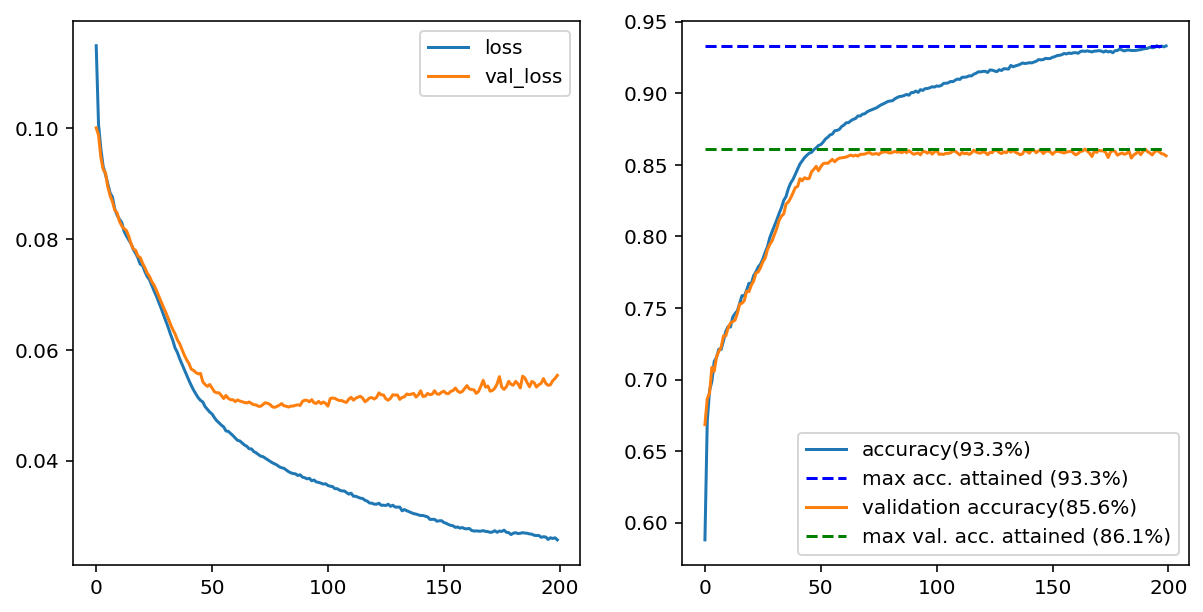

2021-05-27 23:32:52.062629: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library libcublas.so.10.0


In [13]:
model = simple_model()
early_stop = EarlyStopping(monitor='val_accuracy', min_delta = 1e-3, patience=10)
history = model.fit(x_train, y_train, 
                    epochs=200,
                    batch_size=2**15,
                    verbose=1,
                    validation_data=(x_val, y_val),
                    callbacks=[PlotLearning()])

In [14]:
# save model to HDF5
#model.save("model.h5")

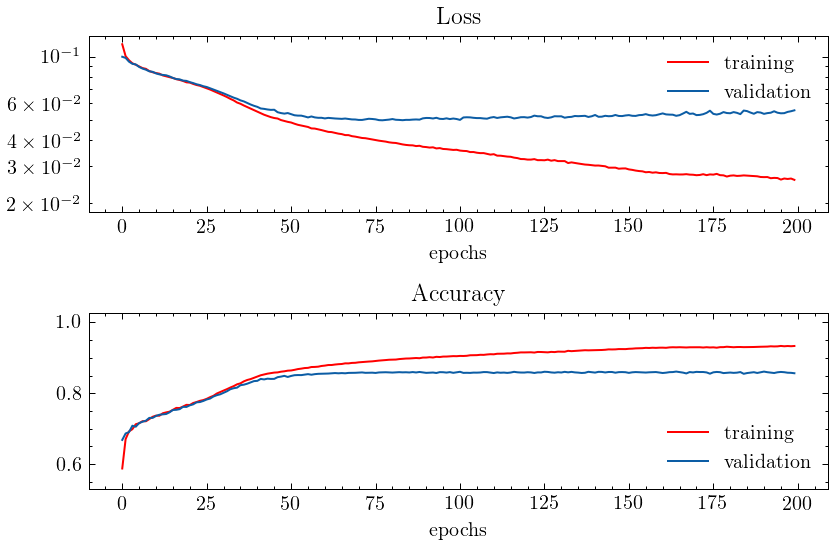

In [15]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("science")
plt.rcParams["figure.figsize"]= (6,4)
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.xlabel('epochs')
plt.plot(history.history['loss'], label='training', color='r')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
y_min = 0.7*min(min(history.history['loss']), min(history.history['val_loss']))
y_max = 1.1*max(max(history.history['loss']), max(history.history['val_loss']))
plt.ylim(y_min, y_max)
plt.yscale('log')
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.xlabel('epochs')
plt.plot(history.history['accuracy'], label='training', color='r')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.subplots_adjust(hspace=0.5)
y_min = 0.9 * min(min(history.history['accuracy']), min(history.history['val_accuracy']))
y_max = 1.1 * max(max(history.history['accuracy']), max(history.history['val_accuracy']))
plt.ylim(y_min, y_max)
plt.savefig("loss_acc_vs_epoch.pdf")
plt.tight_layout()
plt.show()

In [16]:
x_signal_trans = scaler.transform(x_signal[:,:-ignore_last_n_columns])

In [17]:
model.predict(np.array( [x_signal_trans[7],] ))

array([[0.9917034]], dtype=float32)

In [18]:
output_array1 = model.predict_proba(scaler.transform(x_sig_train[:,:-ignore_last_n_columns]))
output_array2 = model.predict_proba(scaler.transform(x_bkg_train[:,:-ignore_last_n_columns]))
output_array3 = model.predict_proba(scaler.transform(x_sig_val[:,:-ignore_last_n_columns]))
output_array4 = model.predict_proba(scaler.transform(x_bkg_val[:,:-ignore_last_n_columns]))

In [19]:
#print(model.evaluate(x_train, y_train))
#print(model.evaluate(x_test, y_test))
#print(model.evaluate(scaler.transform(x_signal), y_signal))
#print(model.evaluate(scaler.transform(x_bkg), y_bkg))

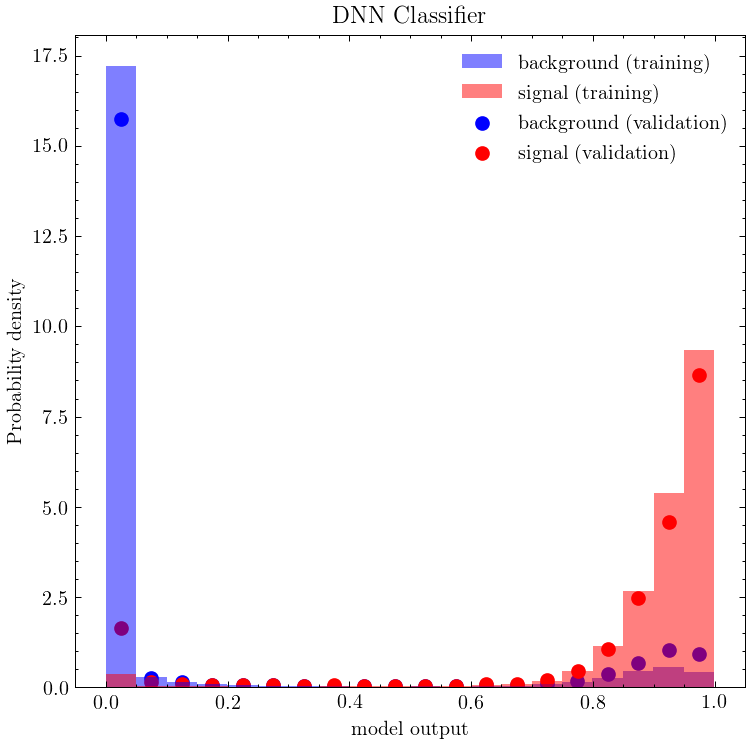

In [20]:
plt.style.use("science")
plt.rcParams["figure.figsize"]= (6,6)
fig, ax = plt.subplots()
n_bins = 20

y, bins, patches = ax.hist(output_array2, bins=n_bins, density=True, color='blue', alpha=0.5, label='background (training)')
y, bins, patches = ax.hist(output_array4, bins=n_bins, density=True, color='blue', alpha=0.0)
bin_centers = [0.5*(bins[i]+bins[i+1]) for i in range(len(bins)-1)]
plt.scatter(bin_centers, y, marker='o', c='blue', s=40, alpha=1,  label='background (validation)')

y, bins, patches = ax.hist(output_array1, bins=n_bins, density=True, color='red', alpha=0.5, label='signal (training)')
y, bins, patches = ax.hist(output_array3, bins=n_bins, density=True, color='red', alpha=0.0)
bin_centers = [0.5*(bins[i]+bins[i+1]) for i in range(len(bins)-1)]
plt.scatter(0.5*(bins[1:] + bins[:-1]), y, marker='o', c='red', s=40, alpha=1, label='signal (validation)')

ax.set_xlabel('model output')
ax.set_ylabel('Probability density')
ax.set_title("DNN Classifier")
ax.legend()
#plt.yscale('log')
plt.savefig("model_output_dist.pdf")
#ax.set_yscale('log')

In [21]:
def get_signal_significance(xsec_sig, xsec_bkg, lumi, output_sig, output_bkg, thresholds):
    
    significance = []
    
    for threshold in thresholds:
        
        n_sig_expected = xsec_sig * lumi
        n_bkg_expected = xsec_bkg * lumi
        
        n_sig_pred_correct = len(output_sig[output_sig>threshold])
        n_sig_pred_wrong   = len(output_sig[output_sig<threshold])
        n_bkg_pred_correct = len(output_bkg[output_bkg<threshold])
        n_bkg_pred_wrong   = len(output_bkg[output_bkg>threshold])
        
        eff_sig = n_sig_pred_correct/len(output_sig)
        eff_bkg = n_bkg_pred_correct/len(output_bkg)
        
        n_sig = n_sig_expected * eff_sig
        n_bkg = n_bkg_expected * (1-eff_bkg)
        
        n_observed = n_sig + n_bkg
        
        if n_bkg > 0:
            sig = math.sqrt(2*n_observed*math.log(1+n_sig/n_bkg)-2*n_sig)
            #sig = n_sig/math.sqrt(n_sig+n_bkg)
        else:
            sig = 0
        
        print("threshold:", "{:.3f}".format(threshold), "\n"
              "eff_sig:", "{:.3f}".format(eff_sig),
              "eff_bkg:", "{:.3f}".format(eff_bkg),
              "n_sig:", "{:.0f}".format(n_sig), 
              "n_bkg:", "{:.0f}".format(n_bkg),
              "n_observed:", "{:.0f}".format(n_observed), "\n",
              "significance:", "{:.3f}".format(sig), "\n\n")
        
        significance.append(sig)    
        
    return thresholds, np.array(significance)

In [22]:
thresholds , significance = get_signal_significance(0.3*832, 130000, 50000, output_array3, 
                                                    output_array4, np.arange(0.01, 1-1e-4, 1e-3))

threshold: 0.010 
eff_sig: 0.935 eff_bkg: 0.746 n_sig: 11664844 n_bkg: 1653270502 n_observed: 1664935346 
 significance: 286.548 


threshold: 0.011 
eff_sig: 0.933 eff_bkg: 0.751 n_sig: 11648984 n_bkg: 1616282861 n_observed: 1627931844 
 significance: 289.407 


threshold: 0.012 
eff_sig: 0.932 eff_bkg: 0.752 n_sig: 11636812 n_bkg: 1609732966 n_observed: 1621369777 
 significance: 289.691 


threshold: 0.013 
eff_sig: 0.931 eff_bkg: 0.755 n_sig: 11623533 n_bkg: 1595477312 n_observed: 1607100845 
 significance: 290.648 


threshold: 0.014 
eff_sig: 0.931 eff_bkg: 0.757 n_sig: 11615787 n_bkg: 1578717288 n_observed: 1590333075 
 significance: 291.988 


threshold: 0.015 
eff_sig: 0.930 eff_bkg: 0.759 n_sig: 11606197 n_bkg: 1566966006 n_observed: 1578572203 
 significance: 292.837 


threshold: 0.016 
eff_sig: 0.930 eff_bkg: 0.760 n_sig: 11601402 n_bkg: 1560608755 n_observed: 1572210157 
 significance: 293.310 


threshold: 0.017 
eff_sig: 0.929 eff_bkg: 0.760 n_sig: 11592550 n_bkg: 15569

threshold: 0.080 
eff_sig: 0.913 eff_bkg: 0.797 n_sig: 11389314 n_bkg: 1322500815 n_observed: 1333890129 
 significance: 312.736 


threshold: 0.081 
eff_sig: 0.912 eff_bkg: 0.797 n_sig: 11387839 n_bkg: 1321344951 n_observed: 1332732790 
 significance: 312.832 


threshold: 0.082 
eff_sig: 0.912 eff_bkg: 0.797 n_sig: 11387101 n_bkg: 1319996443 n_observed: 1331383544 
 significance: 312.971 


threshold: 0.083 
eff_sig: 0.912 eff_bkg: 0.797 n_sig: 11385257 n_bkg: 1318455292 n_observed: 1329840548 
 significance: 313.103 


threshold: 0.084 
eff_sig: 0.912 eff_bkg: 0.797 n_sig: 11383412 n_bkg: 1317684716 n_observed: 1329068128 
 significance: 313.143 


threshold: 0.085 
eff_sig: 0.912 eff_bkg: 0.797 n_sig: 11382675 n_bkg: 1316914140 n_observed: 1328296815 
 significance: 313.214 


threshold: 0.086 
eff_sig: 0.912 eff_bkg: 0.798 n_sig: 11381937 n_bkg: 1314217125 n_observed: 1325599062 
 significance: 313.514 


threshold: 0.087 
eff_sig: 0.912 eff_bkg: 0.798 n_sig: 11378986 n_bkg: 13136

threshold: 0.177 
eff_sig: 0.903 eff_bkg: 0.809 n_sig: 11273495 n_bkg: 1239085978 n_observed: 1250359474 
 significance: 319.780 


threshold: 0.178 
eff_sig: 0.903 eff_bkg: 0.809 n_sig: 11272758 n_bkg: 1238700691 n_observed: 1249973448 
 significance: 319.809 


threshold: 0.179 
eff_sig: 0.903 eff_bkg: 0.809 n_sig: 11272020 n_bkg: 1238508047 n_observed: 1249780067 
 significance: 319.813 


threshold: 0.180 
eff_sig: 0.903 eff_bkg: 0.809 n_sig: 11271282 n_bkg: 1238315403 n_observed: 1249586685 
 significance: 319.816 


threshold: 0.181 
eff_sig: 0.903 eff_bkg: 0.810 n_sig: 11270914 n_bkg: 1237352183 n_observed: 1248623096 
 significance: 319.930 


threshold: 0.182 
eff_sig: 0.903 eff_bkg: 0.810 n_sig: 11270545 n_bkg: 1236774251 n_observed: 1248044796 
 significance: 319.994 


threshold: 0.183 
eff_sig: 0.903 eff_bkg: 0.810 n_sig: 11270176 n_bkg: 1236774251 n_observed: 1248044427 
 significance: 319.984 


threshold: 0.184 
eff_sig: 0.903 eff_bkg: 0.810 n_sig: 11269069 n_bkg: 12363

threshold: 0.351 
eff_sig: 0.894 eff_bkg: 0.820 n_sig: 11155095 n_bkg: 1170312083 n_observed: 1181467178 
 significance: 325.563 


threshold: 0.352 
eff_sig: 0.894 eff_bkg: 0.820 n_sig: 11154357 n_bkg: 1169734151 n_observed: 1180888509 
 significance: 325.621 


threshold: 0.353 
eff_sig: 0.894 eff_bkg: 0.820 n_sig: 11153620 n_bkg: 1169348863 n_observed: 1180502483 
 significance: 325.653 


threshold: 0.354 
eff_sig: 0.894 eff_bkg: 0.820 n_sig: 11152144 n_bkg: 1168963575 n_observed: 1180115720 
 significance: 325.664 


threshold: 0.355 
eff_sig: 0.894 eff_bkg: 0.820 n_sig: 11151407 n_bkg: 1168193000 n_observed: 1179344406 
 significance: 325.749 


threshold: 0.356 
eff_sig: 0.893 eff_bkg: 0.820 n_sig: 11150669 n_bkg: 1168000356 n_observed: 1179151024 
 significance: 325.755 


threshold: 0.357 
eff_sig: 0.893 eff_bkg: 0.820 n_sig: 11149562 n_bkg: 1167807712 n_observed: 1178957274 
 significance: 325.749 


threshold: 0.358 
eff_sig: 0.893 eff_bkg: 0.820 n_sig: 11148825 n_bkg: 11676

threshold: 0.531 
eff_sig: 0.885 eff_bkg: 0.828 n_sig: 11044809 n_bkg: 1119261433 n_observed: 1130306242 
 significance: 329.595 


threshold: 0.532 
eff_sig: 0.885 eff_bkg: 0.828 n_sig: 11043703 n_bkg: 1118876145 n_observed: 1129919847 
 significance: 329.619 


threshold: 0.533 
eff_sig: 0.885 eff_bkg: 0.828 n_sig: 11043703 n_bkg: 1118683501 n_observed: 1129727203 
 significance: 329.647 


threshold: 0.534 
eff_sig: 0.885 eff_bkg: 0.828 n_sig: 11043334 n_bkg: 1118490857 n_observed: 1129534191 
 significance: 329.664 


threshold: 0.535 
eff_sig: 0.885 eff_bkg: 0.828 n_sig: 11042965 n_bkg: 1118105569 n_observed: 1129148534 
 significance: 329.710 


threshold: 0.536 
eff_sig: 0.885 eff_bkg: 0.828 n_sig: 11042965 n_bkg: 1117720281 n_observed: 1128763246 
 significance: 329.766 


threshold: 0.537 
eff_sig: 0.885 eff_bkg: 0.828 n_sig: 11041490 n_bkg: 1116949705 n_observed: 1127991195 
 significance: 329.836 


threshold: 0.538 
eff_sig: 0.885 eff_bkg: 0.828 n_sig: 11040752 n_bkg: 11165

threshold: 0.709 
eff_sig: 0.871 eff_bkg: 0.837 n_sig: 10864442 n_bkg: 1057422720 n_observed: 1068287162 
 significance: 333.535 


threshold: 0.710 
eff_sig: 0.870 eff_bkg: 0.837 n_sig: 10861860 n_bkg: 1056844788 n_observed: 1067706648 
 significance: 333.547 


threshold: 0.711 
eff_sig: 0.870 eff_bkg: 0.837 n_sig: 10860385 n_bkg: 1056844788 n_observed: 1067705173 
 significance: 333.502 


threshold: 0.712 
eff_sig: 0.870 eff_bkg: 0.837 n_sig: 10858541 n_bkg: 1056266856 n_observed: 1067125397 
 significance: 333.536 


threshold: 0.713 
eff_sig: 0.870 eff_bkg: 0.838 n_sig: 10857065 n_bkg: 1055303637 n_observed: 1066160702 
 significance: 333.643 


threshold: 0.714 
eff_sig: 0.870 eff_bkg: 0.838 n_sig: 10855221 n_bkg: 1055110993 n_observed: 1065966213 
 significance: 333.616 


threshold: 0.715 
eff_sig: 0.870 eff_bkg: 0.838 n_sig: 10853746 n_bkg: 1054340417 n_observed: 1065194162 
 significance: 333.693 


threshold: 0.716 
eff_sig: 0.870 eff_bkg: 0.838 n_sig: 10851532 n_bkg: 10537

threshold: 0.880 
eff_sig: 0.722 eff_bkg: 0.886 n_sig: 9006182 n_bkg: 739945467 n_observed: 748951649 
 significance: 330.418 


threshold: 0.881 
eff_sig: 0.719 eff_bkg: 0.887 n_sig: 8969297 n_bkg: 737248451 n_observed: 746217748 
 significance: 329.666 


threshold: 0.882 
eff_sig: 0.715 eff_bkg: 0.888 n_sig: 8928724 n_bkg: 731083845 n_observed: 740012568 
 significance: 329.553 


threshold: 0.883 
eff_sig: 0.713 eff_bkg: 0.889 n_sig: 8895158 n_bkg: 724726594 n_observed: 733621752 
 significance: 329.748 


threshold: 0.884 
eff_sig: 0.710 eff_bkg: 0.889 n_sig: 8861593 n_bkg: 718947275 n_observed: 727808868 
 significance: 329.818 


threshold: 0.885 
eff_sig: 0.708 eff_bkg: 0.890 n_sig: 8829872 n_bkg: 716057615 n_observed: 724887487 
 significance: 329.300 


threshold: 0.886 
eff_sig: 0.705 eff_bkg: 0.891 n_sig: 8794831 n_bkg: 710470940 n_observed: 719265772 
 significance: 329.277 


threshold: 0.887 
eff_sig: 0.702 eff_bkg: 0.892 n_sig: 8762004 n_bkg: 705076909 n_observed: 71383

334.55421485915485


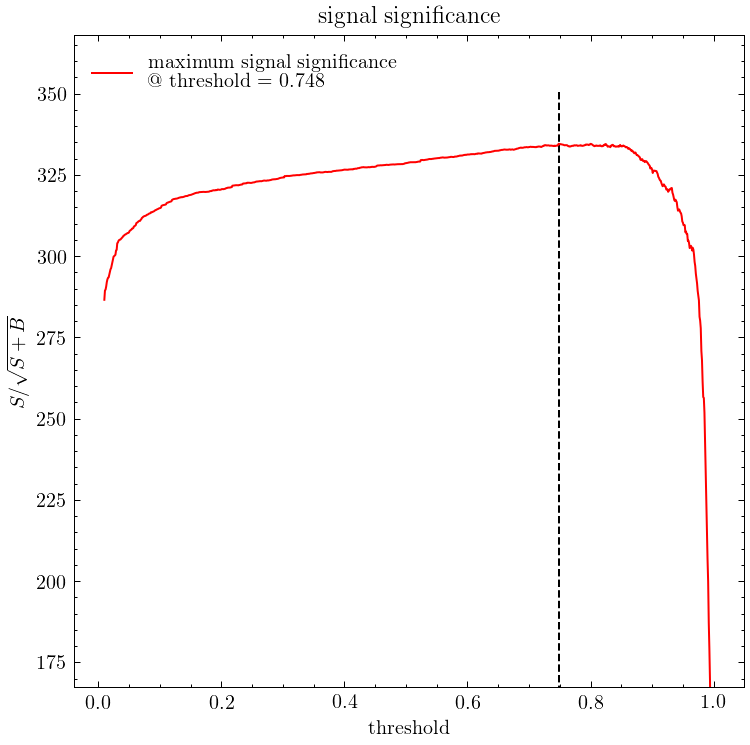

In [23]:
max_sig_threshold = thresholds[np.where(significance==max(significance))][0]
print(max(significance))
plt.figure(1)
plt.plot([max_sig_threshold, max_sig_threshold], [0, 1.05*max(significance)], 'k--')
plt.plot(thresholds, significance, label='maximum signal significance \n@ threshold = {:.3f}'.format(max_sig_threshold), color="red")
plt.xlabel('threshold')
plt.ylabel(r"$S/\sqrt{S+B}$")
plt.ylim([0.5*max(significance),1.1*max(significance)])
plt.title('signal significance')
plt.legend(loc="best")
plt.savefig("significance.pdf")

In [24]:
from sklearn.metrics import roc_curve
y_pred_keras = model.predict(x_val).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_val, y_pred_keras)

from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

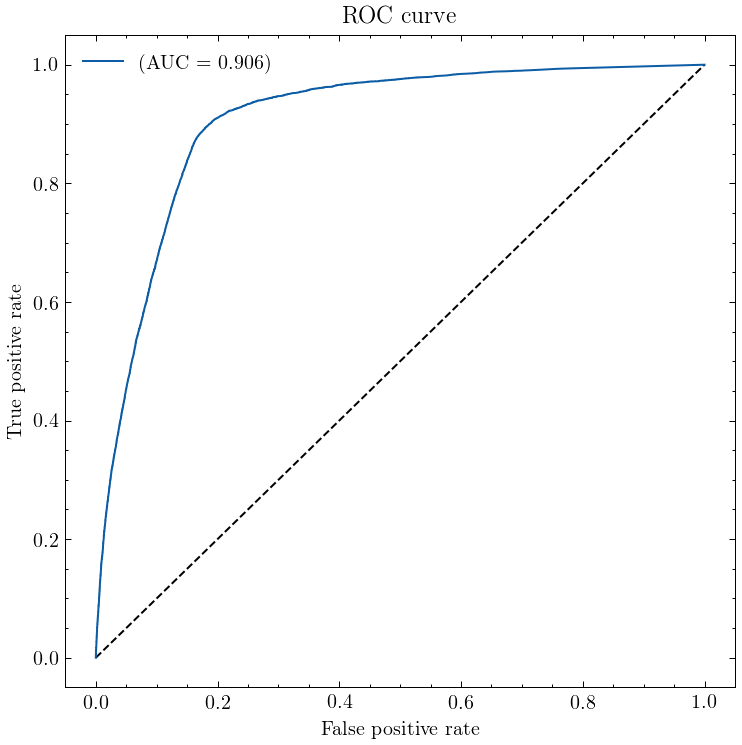

In [25]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='(AUC = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()